In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
ratings = pd.read_csv(r'/Users/ladee/Desktop/rating 2.csv')
ratings.head(5)

,User_Id,Hotel_Id,Rating,Timestamp
0,1,44,4.9,964982400
1,1,31,5.0,964982838
2,1,17,4.6,964982176
3,1,10,4.8,964984002
4,1,2,4.6,964982931


In [92]:
ratings.shape

(95, 4)

In [93]:
hotels=pd.read_csv(r'/Users/ladee/Desktop/hotels 2.csv')
hotels.head(5)

,Hotel_Id,Hotel_name,Category,Hotel_location
0,1,Warwick San Fracisco,Pet Friendly|Breakfast,San Francisco
1,2,The Ritz Calton San Francisco,Vallet|Breakfast|Downtown|Pool|Pet Friendly,San Francisco
2,3,The Orchard Hotel,Vallet Parking| Pet Friendly,San Francisco
3,4,The Marker San Fracisco,Pet Friendly|Breakfast|Pool,San Francisco
4,5,The Kensington Park Hotel,Pool|Free WiFI,San Francisco


# Merging Ratings & Hotels Dataset

In [94]:
hotels_ratings = pd.merge(hotels, ratings)
hotels_ratings.head(15)

,Hotel_Id,Hotel_name,Category,Hotel_location,User_Id,Rating,Timestamp
0,1,Warwick San Fracisco,Pet Friendly|Breakfast,San Francisco,2,3.0,964982563
1,1,Warwick San Fracisco,Pet Friendly|Breakfast,San Francisco,4,3.0,964984086
2,2,The Ritz Calton San Francisco,Vallet|Breakfast|Downtown|Pool|Pet Friendly,San Francisco,1,4.6,964982931
3,2,The Ritz Calton San Francisco,Vallet|Breakfast|Downtown|Pool|Pet Friendly,San Francisco,2,4.0,964982653
4,2,The Ritz Calton San Francisco,Vallet|Breakfast|Downtown|Pool|Pet Friendly,San Francisco,3,4.9,964981179
5,2,The Ritz Calton San Francisco,Vallet|Breakfast|Downtown|Pool|Pet Friendly,San Francisco,4,4.0,964981710
6,2,The Ritz Calton San Francisco,Vallet|Breakfast|Downtown|Pool|Pet Friendly,San Francisco,5,4.3,964981529
7,2,The Ritz Calton San Francisco,Vallet|Breakfast|Downtown|Pool|Pet Friendly,San Francisco,7,4.6,964982176
8,2,The Ritz Calton San Francisco,Vallet|Breakfast|Downtown|Pool|Pet Friendly,San Francisco,9,4.0,964981179
9,3,The Orchard Hotel,Vallet Parking| Pet Friendly,San Francisco,2,5.0,964981909


In [95]:
hotels_ratings.groupby('Hotel_name')['Rating'].mean().head(10)  

Hotel_name
1851 INN ON ST CHARLES              3.0
A CREOLE COTTAGE                    5.0
ANTEBELLUM GUEST HOUSE              3.0
AULD SWEET OLIVE                    3.0
BIENVILLE HOUSE MOTOR HOTEL         5.0
Cow Hollow Inn and Suites           5.0
DAYS INN                            5.0
FEDERAL CITY INN & SUITES           5.0
FRENCHMEN STREET BED & BREAKFAST    5.0
Fairmont San Fracisco               5.0
Name: Rating, dtype: float64

# Ratings in the descending order of their average rating

In [96]:
hotels_ratings.groupby('Hotel_name')['Rating'].mean().sort_values(ascending=False).head(10) 

Hotel_name
MOTEL 6                                   5.0
STUDIO 6 #6000                            5.0
FRENCHMEN STREET BED & BREAKFAST          5.0
Harbor Court Hotel                        5.0
Holiday Inn                               5.0
FEDERAL CITY INN & SUITES                 5.0
Hotel Drisco Pacific Heights              5.0
JW Marriott San Francisco Union Square    5.0
KERLEREC HOUSE                            5.0
DAYS INN                                  5.0
Name: Rating, dtype: float64

# Let's now plot the total number of ratings for a hotel

In [97]:
hotels_ratings.groupby('Hotel_name')['Rating'].count().sort_values(ascending=False).head() 

Hotel_name
The Ritz Calton San Francisco       7
Omni San Francisco Hotel            7
Four Seasons Hotel San Francisco    5
Hotel Sepro                         5
San Francisco Marriott Marquis      5
Name: Rating, dtype: int64

In [98]:
ratings_mean_count = pd.DataFrame(hotels_ratings.groupby('Hotel_name')['Rating'].mean())  

In [99]:
ratings_mean_count['rating_counts'] = pd.DataFrame(hotels_ratings.groupby('Hotel_name')['Rating'].count())  

In [100]:
ratings_mean_count.groupby('Hotel_name')['Rating'].count().sort_values(ascending=False).head() 

Hotel_name
Warwick San Fracisco               1
HAMPTON INN - ST. CHARLES          1
Kimpton Sir Francis Drake Hotel    1
Kimpton Buchanan                   1
KERLEREC HOUSE                     1
Name: Rating, dtype: int64

In [101]:
ratings_mean_count.head()  

,Rating,rating_counts
Hotel_name,,
1851 INN ON ST CHARLES,3.0,1
A CREOLE COTTAGE,5.0,1
ANTEBELLUM GUEST HOUSE,3.0,1
AULD SWEET OLIVE,3.0,1
BIENVILLE HOUSE MOTOR HOTEL,5.0,1


# Let's plot a histogram for the number of ratings represented by the "rating_counts" column in the above dataframe. Execute the following script:

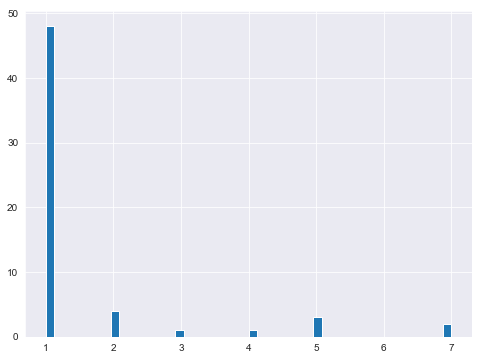

In [102]:
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50)  



# Now we'll plot a histogram for average ratings. Here is the code to do so:

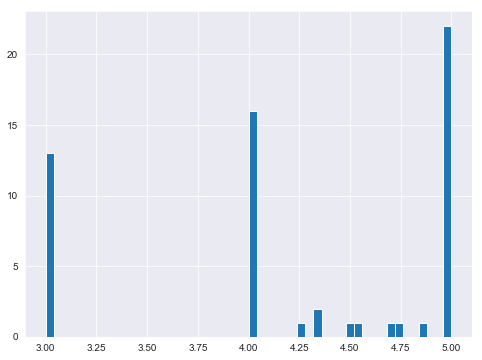

In [103]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

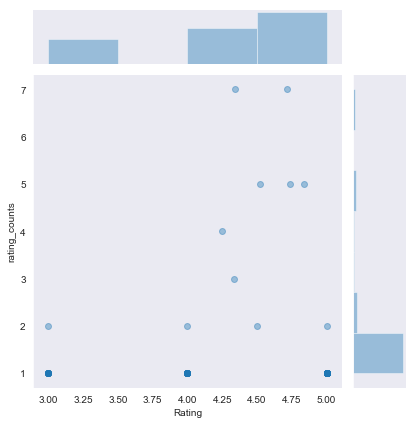

In [104]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)  

# Finding Similarities Between Hotels

In [105]:
user_hotel_rating = hotels_ratings.pivot_table(index='User_Id', columns='Hotel_name', values='Rating') 

In [106]:
user_hotel_rating.head() 

Hotel_name,1851 INN ON ST CHARLES,A CREOLE COTTAGE,ANTEBELLUM GUEST HOUSE,AULD SWEET OLIVE,BIENVILLE HOUSE MOTOR HOTEL,Cow Hollow Inn and Suites,DAYS INN,FEDERAL CITY INN & SUITES,FRENCHMEN STREET BED & BREAKFAST,Fairmont San Fracisco,...,THE QUEEN ANNE HOTEL,THE ROOSEVELT HOTEL WAC,THE TREME INN,TIRC HOTEL,Taj Campton Place,The Inn at Union Square- A Greystone Hotel,The Orchard Hotel,The Ritz Calton San Francisco,WYNDHAM NEW ORLEANS,Warwick San Fracisco
User_Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.6,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,5.0,4.0,NaN,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,3.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3,NaN,NaN


# To find the user ratings for 'The Ritz Calton San Francisco', execute the following script:

In [107]:
Carlton_ratings = user_hotel_rating['The Ritz Calton San Francisco']  

In [108]:
Carlton_ratings.head(10)

User_Id
1    4.6
2    4.0
3    4.9
4    4.0
5    4.3
6    NaN
7    4.6
8    NaN
9    4.0
Name: The Ritz Calton San Francisco, dtype: float64

In [109]:
Carlton_ratings.count()

7

# Now let's retrieve all the hotels that are similar to 'The Ritz Calton San Francisco'. We can find the correlation between the user ratings for the 'The Ritz Calton San Francisco' and all the other hotesls using corrwith() function as shown below:

In [110]:
hotels_like_Carlton = user_hotel_rating.corrwith(Carlton_ratings)

corr_Carlton_Hotel = pd.DataFrame(hotels_like_Carlton, columns=['Correlation'])
corr_Carlton_Hotel.dropna(inplace=True)  
corr_Carlton_Hotel.head()  

,Correlation
Hotel_name,
Four Seasons Hotel San Francisco,0.613285
Hotel Sepro,0.209533
Omni San Francisco Hotel,-0.076194
San Francisco Marriott Marquis,0.730769
The Ritz Calton San Francisco,1.000000


# Conclusion: As we can see in the above result 'San Francisco Marriott Marquis' hotel is highly correlated with "'The Ritz Calton San Francisco'. The same user has given ratings  above '4.5' for these hotels and the negative correlation states that it is completly opposite of what guest is looking(ratings should be less) 